In [453]:
# importing libraries and data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv(open('titanic_data.csv'))
print (titanic.shape)
print ('*******************************')
print (titanic.head())
print ('*******************************')
print (titanic.dtypes)
print ('*******************************')

# 'PassengerId','Ticket','Cabin','Embarked' and 'Name' will not play a part in my analysis thus they will be removed.

titanic = titanic.drop(['PassengerId','Ticket','Cabin','Embarked','Name'], axis=1)

# filter out rows based on missing values in a the column 'Age' since missing Age data will affect the analysis
# number of non-NA/null observations in the Series

print (titanic['Age'].shape)
print (titanic['Age'].count())
titanic = titanic.loc[titanic['Age'].notnull()]
print (titanic.shape)


(891, 12)
*******************************
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

male      453
female    261
Name: Sex, dtype: int64


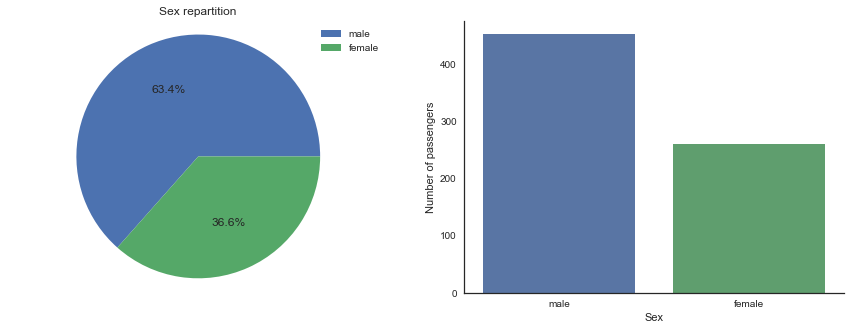

In [457]:
#data exploration
#number of passenger male / female

print (titanic['Sex'].value_counts())
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
data = titanic['Sex'].value_counts()
plt.pie(x=data, data=data, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['male','female'],loc='upper right')
plt.title('Sex repartition')

fig.add_subplot(1,2,2)
sns.set_style('white')
g=sns.countplot(x="Sex", data=titanic)
g.set(ylabel="Number of passengers")
sns.despine()

# 63,4 % of passengers are male

0    424
1    290
Name: Survived, dtype: int64


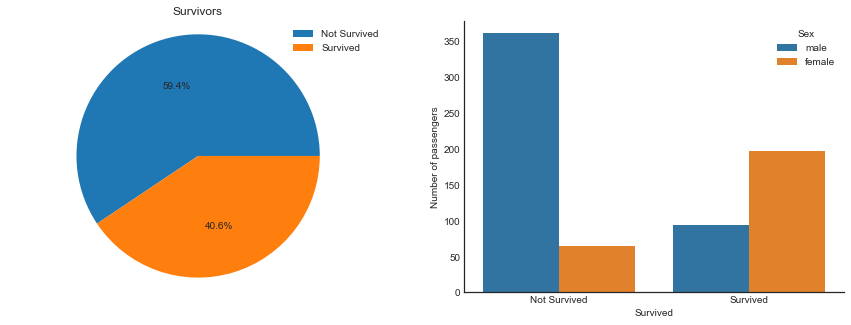

In [364]:
#number of survived passenger / not survived passenger
print (titanic['Survived'].value_counts())
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
data = titanic['Survived'].value_counts()
plt.pie(x=data, data=data, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['Not Survived','Survived'],loc='upper right')
plt.title('Survivors')
fig.add_subplot(1,2,2)
sns.set_style('white')
g=sns.countplot(x="Survived",hue='Sex', data=titanic)
g.set(ylabel="Number of passengers")
g.set_xticklabels(["Not Survived", "Survived"])
sns.despine()

# 40,6 % of passengers survived the tragedy
# women have a higher survival rate than men

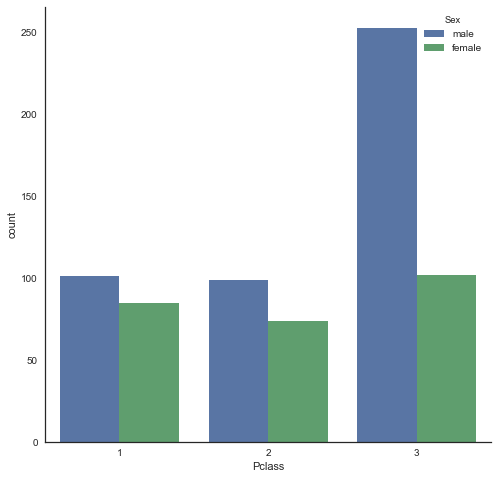

In [458]:
# Class repartition
fig =plt.figure(figsize=(8,8))
sns.countplot(x="Pclass",hue="Sex", data=titanic)
sns.despine()

# the third class is the most represented

Category
Adult       601
Baby         14
Child        50
Teenager     49
dtype: int64


Text(0.5,1,'Age category repartition')

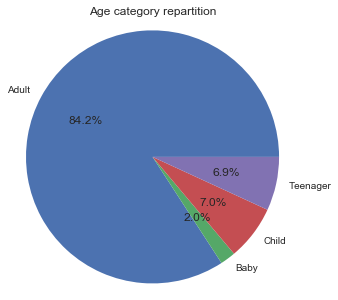

In [464]:
# split passengers by age

def age_cat(x):
    
    if x >=18:
        return 'Adult'
    if x >= 11 and x < 18:
        return 'Teenager'
    if x >= 2 and x < 11:
        return 'Child'
    if x > 0 and x < 2:
        return 'Baby'
    
titanic['Category']=titanic['Age'].copy().apply(age_cat)
print (titanic.groupby(['Category']).size())


fig =plt.figure(figsize=(5,5))
plt.pie(titanic.groupby(['Category']).size(),labels=titanic.groupby(['Category']).size().index,autopct='%1.1f%%')
#plt.legend()
plt.axis('equal')
plt.title('Age category repartition')
# 84,2 % of passengers are adults

Text(0.5,0.1,'Age category repartition')

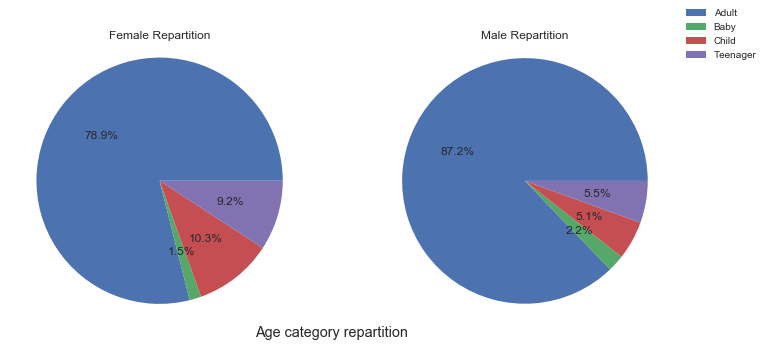

In [466]:
data_female = titanic.loc[titanic['Sex']=='female']
data_male = titanic.loc[titanic['Sex']=='male']

fig =plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
plt.pie(x=data_female.groupby(['Category']).size(), data=data_female.groupby(['Category']).size(), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Female Repartition')
fig.add_subplot(1,2,2)

plt.pie(x=data_male.groupby(['Category']).size(), data=data_male.groupby(['Category']).size(), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Male Repartition')
fig.legend(data_female.groupby(['Category']).size().index,loc='upper right')
plt.suptitle(x=0.5,y=0.1,t='Age category repartition')


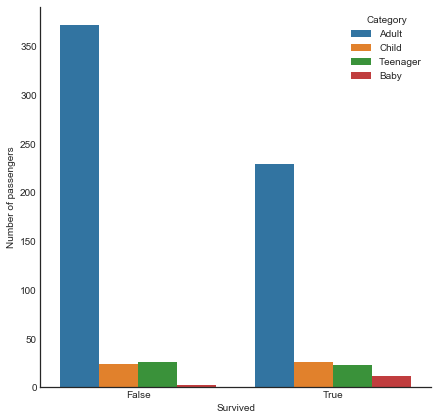

In [367]:
# age category repartition
fig=plt.figure(figsize=(7,7))
g=sns.countplot(x="Survived",hue="Category", data=titanic)
g.set(ylabel="Number of passengers")
g.set_xticklabels(["False", "True"])
sns.despine()

# baby and child categories have a positive survival rate

Index(['male', 'female'], dtype='object')


<Figure size 432x288 with 0 Axes>

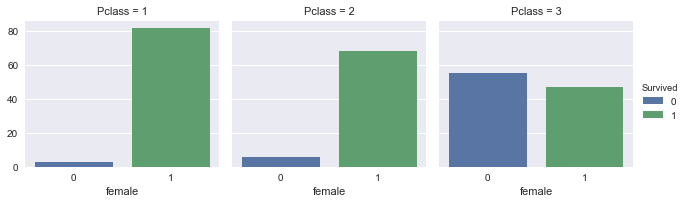

In [477]:
print(titanic['Sex'].value_counts().index)
sns.set()
plt.figure()
g = sns.FacetGrid(col="Pclass",hue='Survived',data=titanic.loc[titanic['Sex']=='female'])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set(xlabel="female")
g.add_legend()

# women from the first and the second class have a higher survival rate than women from the third class

Index(['male', 'female'], dtype='object')


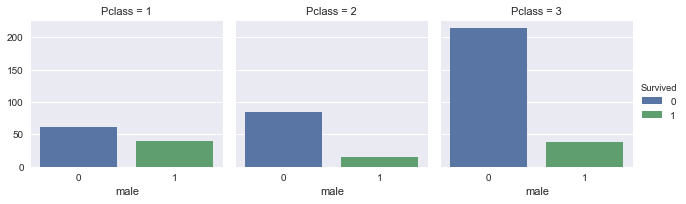

In [480]:
print(titanic['Sex'].value_counts().index)
sns.set()
g = sns.FacetGrid(col="Pclass",hue='Survived',data=titanic.loc[titanic['Sex']=='male'])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set(xlabel="male")
g.add_legend()

#  men from the different classes have a negative survival rate

In [496]:
grouped_data1 = titanic.groupby(['Sex','Pclass','Category'])
#print (grouped_data1.size())

print ('*****************')

grouped_data = titanic.groupby(['Survived','Sex','Pclass','Category'])
#print (grouped_data.size())



*****************


In [525]:
def survival_rate(data,sex,socialclass,age_cat):
    if age_cat in data.loc[(data['Sex']==sex) & (data['Pclass']==socialclass),'Category'].values:
        return (data.loc[(data['Survived']==1) & (data['Sex']==sex) & (data['Pclass']==socialclass) & (data['Category']==age_cat),'Survived'].count() / data.loc[(data['Sex']==sex) & (data['Pclass']==socialclass) & (data['Category']==age_cat),'Survived'].count()*100).round(2)

for sex in ['female','male']:
    for socialclass in [1,2,3]:
        for age_cat in ['Adult','Teenager','Child','Baby']:
            print('*****',"\n" ,sex,age_cat,'from class',socialclass,'is',survival_rate(titanic,sex,socialclass,age_cat))


***** 
 female Adult from class 1 is 97.4
***** 
 female Teenager from class 1 is 100.0
***** 
 female Child from class 1 is 0.0
***** 
 female Baby from class 1 is None
***** 
 female Adult from class 2 is 90.32
***** 
 female Teenager from class 2 is 100.0
***** 
 female Child from class 2 is 100.0
***** 
 female Baby from class 2 is None
***** 
 female Adult from class 3 is 41.79
***** 
 female Teenager from class 3 is 61.54
***** 
 female Child from class 3 is 38.89
***** 
 female Baby from class 3 is 100.0
***** 
 male Adult from class 1 is 37.11
***** 
 male Teenager from class 1 is 100.0
***** 
 male Child from class 1 is 100.0
***** 
 male Baby from class 1 is 100.0
***** 
 male Adult from class 2 is 6.82
***** 
 male Teenager from class 2 is 0.0
***** 
 male Child from class 2 is 100.0
***** 
 male Baby from class 2 is 100.0
***** 
 male Adult from class 3 is 13.33
***** 
 male Teenager from class 3 is 9.52
***** 
 male Child from class 3 is 33.33
***** 
 male Baby from class 

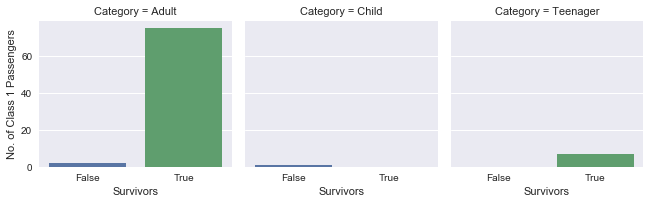

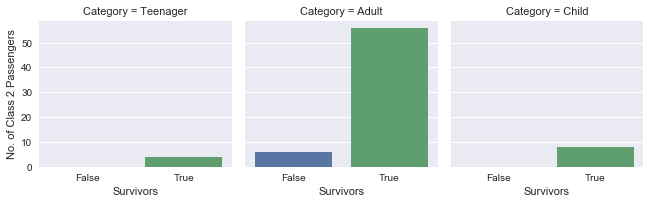

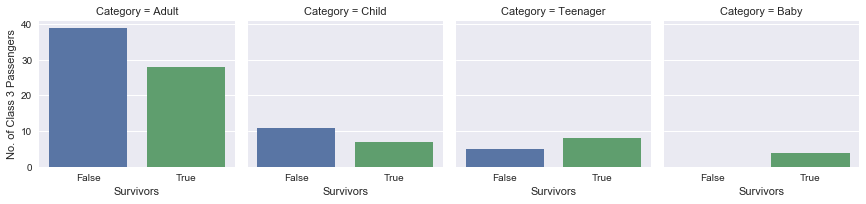

In [529]:
# female survival rate for each age category 
data = titanic.loc[titanic['Sex']=='female']
sns.set()
g = sns.FacetGrid(col="Category",hue='Survived',data=data.loc[data['Pclass']==1])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set_axis_labels('Survivors', 'No. of Class 1 Passengers')
g.set_xticklabels(["False", "True"])

g = sns.FacetGrid(col="Category",hue='Survived',data=data.loc[data['Pclass']==2])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set_axis_labels('Survivors', 'No. of Class 2 Passengers')
g.set_xticklabels(["False", "True"])

g = sns.FacetGrid(col="Category",hue='Survived',data=data.loc[data['Pclass']==3])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set_axis_labels('Survivors', 'No. of Class 3 Passengers')
g.set_xticklabels(["False", "True"])


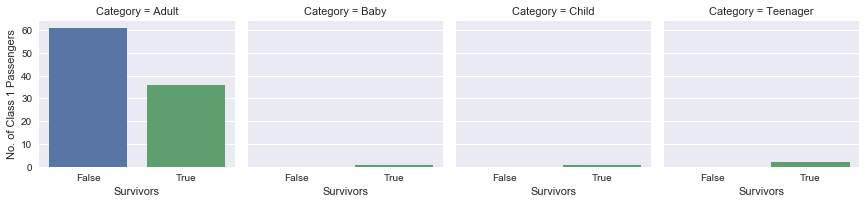

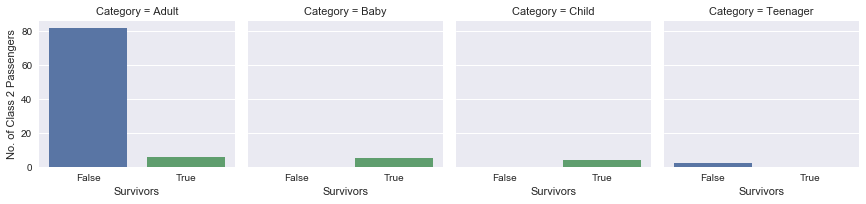

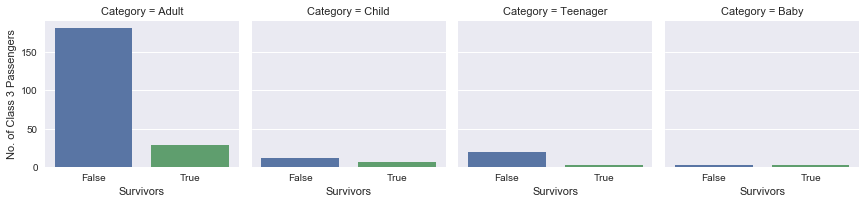

In [528]:
# male survival rate for each age category 
data = titanic.loc[titanic['Sex']=='male']
sns.set()
g = sns.FacetGrid(col="Category",hue='Survived',data=data.loc[data['Pclass']==1])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set_axis_labels('Survivors', 'No. of Class 1 Passengers')
g.set_xticklabels(["False", "True"])

g = sns.FacetGrid(col="Category",hue='Survived',data=data.loc[data['Pclass']==2])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set_axis_labels('Survivors', 'No. of Class 2 Passengers')
g.set_xticklabels(["False", "True"])

g = sns.FacetGrid(col="Category",hue='Survived',data=data.loc[data['Pclass']==3])
g.map(sns.countplot,'Survived',order = titanic['Survived'].value_counts().index)
g.set_axis_labels('Survivors', 'No. of Class 3 Passengers')
g.set_xticklabels(["False", "True"])


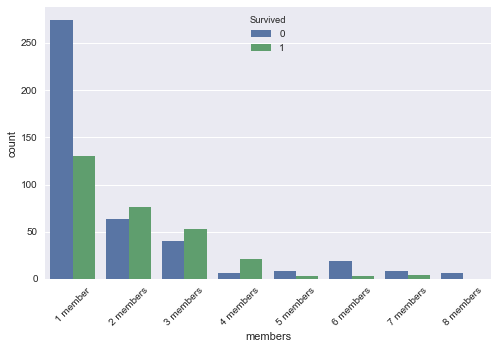

In [530]:
# survival rate by family connections
titanic['members']=titanic['Parch']+titanic['SibSp']+1
#print (titanic['members'].value_counts())
#print(titanic.groupby(['members','Survived']).size())
plt.figure(figsize=(8,5))
g=sns.countplot(x='members',hue='Survived',data=titanic)
labels=['1 member', '2 members', '3 members', '4 members', '5 members', '6 members', '7 members', '8 members']
g.set_xticklabels(labels,rotation=45)
sns.set_style('white')
sns.despine()

# family connections with 5 members and higher have negative survival rate